In [320]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Load data

In [321]:
data_imdb = pd.read_csv('clean_data_imdb.csv')
data_bechdel = pd.read_csv('clean_data_bechdel.csv')
data_character = pd.read_csv('clean_data_character.csv')
data_original = pd.read_csv('clean_data_original.csv')
ethnicity_df = pd.read_csv('ethnicity_labels.csv')

In [322]:
ethnicity_df.head()

,Unnamed: 0,ethnicity_ID,wikidata_id,ethnicity_label,corresponding_ethnicity,count
0,0,/m/044038p,NaN,Canadian,NaN,145
1,1,/m/0x67,Q49085,African Americans,https://en.wikipedia.org/wiki/African_Americans,1464
2,2,/m/064b9n,Q120601,Omaha Tribe of Nebraska,https://en.wikipedia.org/wiki/Omaha_people,1
3,3,/m/041rx,Q7325,Jewish people,https://en.wikipedia.org/wiki/Jews,703
4,4,/m/033tf_,Q1075293,Irish Americans,https://en.wikipedia.org/wiki/Irish_Americans,196


## Proportion of female vs male actors

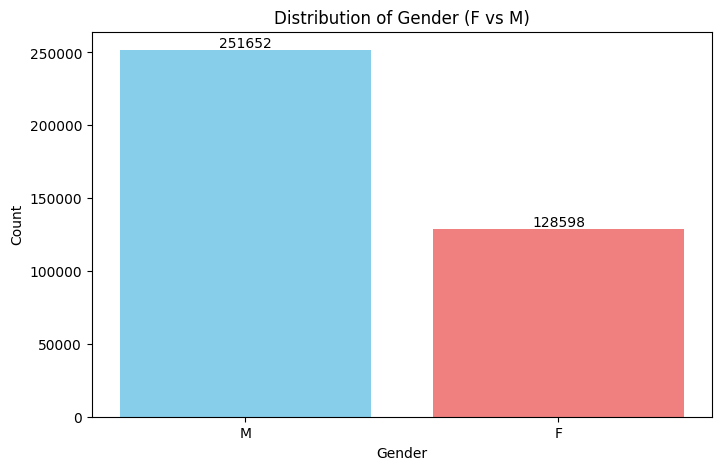

Over the 425406 total number of characters there are 128598 women. It represents 30.95 % of the characters.


In [323]:
# Assuming 'gender' is the column with 'F' and 'M' values
gender_counts = data_character['actor_gender'].value_counts()

# Plot the distribution of gender
plt.figure(figsize=(8, 5))
bars = plt.bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])

# Add the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 100, int(yval), ha='center', va='bottom')

# Set plot labels and title
plt.title('Distribution of Gender (F vs M)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

print(f"Over the {data_character.shape[0]} total number of characters there are {gender_counts['F']} women.",
      f"It represents {100-((data_character.shape[0]-gender_counts['M'])/gender_counts['M']*100):,.4g} % of the characters.")

### Select only woman actress

In [324]:
women_data = data_character[data_character['actor_gender']=='F'].copy()
men_data = data_character[data_character['actor_gender']=='M'].copy()

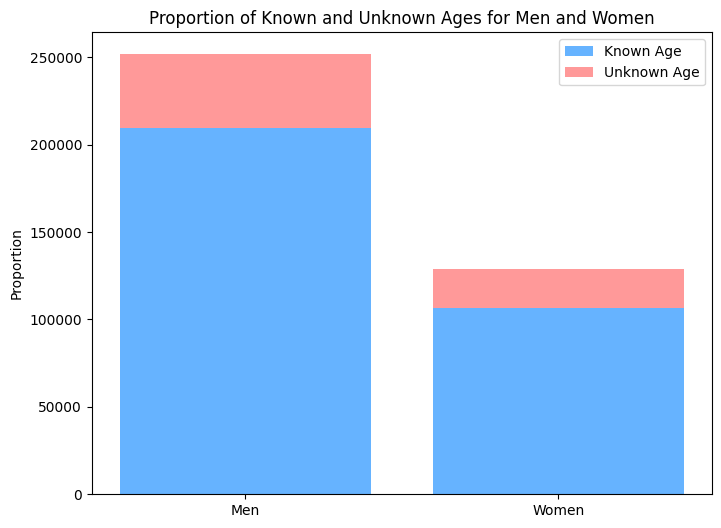

In [325]:
men_known_age = men_data['actor_age_movie_released'].notna().sum()
men_unknown_age = men_data['actor_age_movie_released'].isna().sum()
women_known_age = women_data['actor_age_movie_released'].notna().sum()
women_unknown_age = women_data['actor_age_movie_released'].isna().sum()

# Preparing data for each gender
labels = ['Known Age', 'Unknown Age']
men_info = [men_known_age, men_unknown_age]
women_info = [women_known_age, women_unknown_age]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))

# Stacked bar plot
ax.bar('Men', men_info[0], label='Known Age', color='#66b3ff')
ax.bar('Men', men_info[1], bottom=men_info[0], label='Unknown Age', color='#ff9999')
ax.bar('Women', women_info[0], color='#66b3ff')
ax.bar('Women', women_info[1], bottom=women_info[0], color='#ff9999')

# Adding labels and title
ax.set_ylabel('Proportion')
ax.set_title('Proportion of Known and Unknown Ages for Men and Women')
ax.legend(labels, loc='upper right')
plt.show()


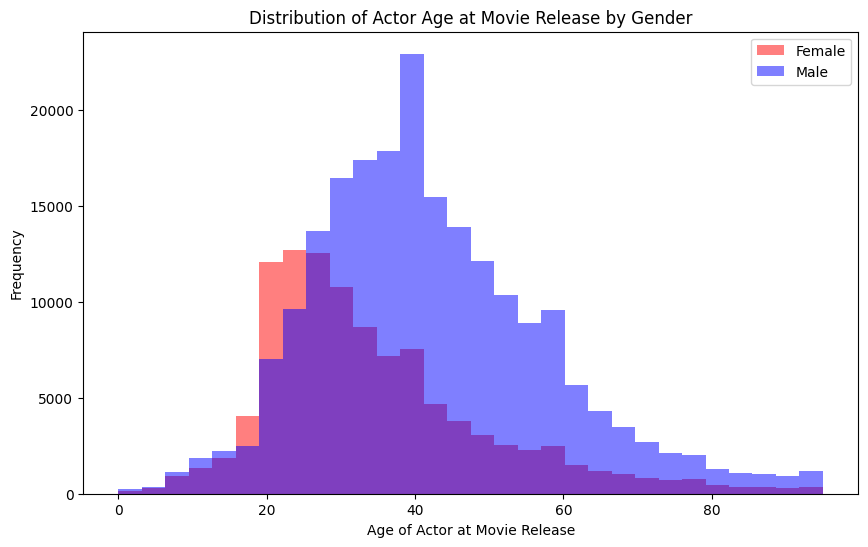

In [326]:
import matplotlib.pyplot as plt

# Separate the ages by gender
female_ages = data_character[data_character['actor_gender'] == 'F']['actor_age_movie_released'].dropna()
male_ages = data_character[data_character['actor_gender'] == 'M']['actor_age_movie_released'].dropna()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot histograms for both genders
plt.hist(female_ages, bins=30, alpha=0.5, label='Female', color='red')
plt.hist(male_ages, bins=30, alpha=0.5, label='Male', color='blue')

# Add labels and title
plt.xlabel('Age of Actor at Movie Release')
plt.ylabel('Frequency')
plt.title('Distribution of Actor Age at Movie Release by Gender')

# Add legend
plt.legend()

# Show the plot
plt.show()


/var/folders/yc/lz46krrd2mj9d_tjm637grg40000gn/T/ipykernel_72305/1076488913.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


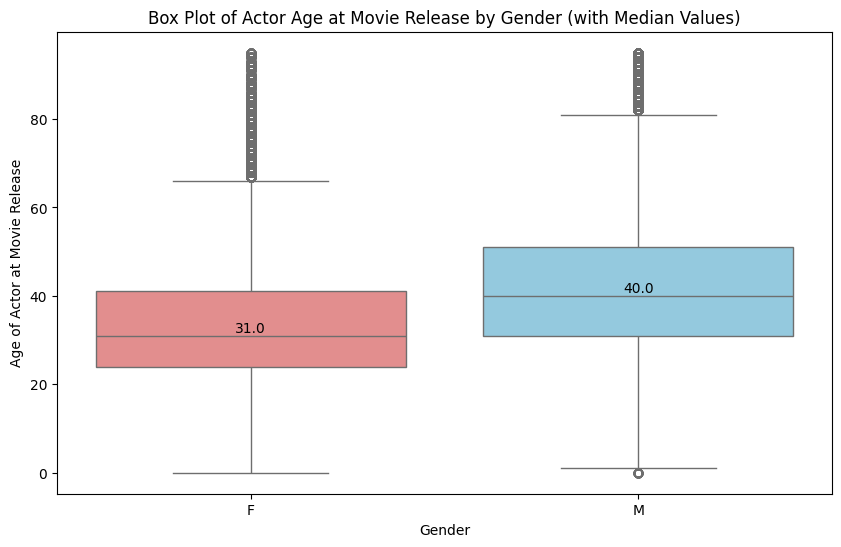

In [327]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for genders
colors = {'F': 'lightcoral', 'M': 'skyblue'}

plt.figure(figsize=(10, 6))

# Create the box plot with custom colors
ax = sns.boxplot(
    data=data_character,
    x='actor_gender',
    y='actor_age_movie_released',
    palette=colors
)

# Calculate median values for each gender
median_values = data_character.groupby('actor_gender')['actor_age_movie_released'].median()

# Annotate the median values on the plot
for i, (gender, median) in enumerate(median_values.items()):
    ax.text(i, median, f'{median:.1f}', color='black', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Age of Actor at Movie Release')
plt.title('Box Plot of Actor Age at Movie Release by Gender (with Median Values)')

# Show the plot
plt.show()


In [328]:
women_data.head()

,Unnamed: 0,Wiki_ID,Movie_ID,release_date,character_name,actor_birth_date,actor_gender,actor_height,ethnicity_ID,actor_name,actor_age_movie_released,character/actor_ID,character_ID,Actor_ID,Movie_title,release_year,birth_year,Movie_Count,ethnicity
0,0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,Ghosts of Mars,2001.0,1958.0,8.0,NaN
1,1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,Ghosts of Mars,2001.0,1974.0,23.0,Canadian
4,4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,Ghosts of Mars,2001.0,1977.0,31.0,NaN
5,5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,Ghosts of Mars,2001.0,1949.0,44.0,African Americans
6,6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,Ghosts of Mars,2001.0,1945.0,41.0,NaN


In [329]:
ethnicity_df['ethnic_cat'] = ethnicity_df.index
data_character = pd.merge(women_data, ethnicity_df[['ethnicity_ID', 'ethnic_cat']], on='ethnicity_ID', how='left')
women_data = pd.merge(women_data, ethnicity_df[['ethnicity_ID', 'ethnic_cat']], on='ethnicity_ID', how='left')

ethnicity_df.head()

,Unnamed: 0,ethnicity_ID,wikidata_id,ethnicity_label,corresponding_ethnicity,count,ethnic_cat
0,0,/m/044038p,NaN,Canadian,NaN,145,0
1,1,/m/0x67,Q49085,African Americans,https://en.wikipedia.org/wiki/African_Americans,1464,1
2,2,/m/064b9n,Q120601,Omaha Tribe of Nebraska,https://en.wikipedia.org/wiki/Omaha_people,1,2
3,3,/m/041rx,Q7325,Jewish people,https://en.wikipedia.org/wiki/Jews,703,3
4,4,/m/033tf_,Q1075293,Irish Americans,https://en.wikipedia.org/wiki/Irish_Americans,196,4


In [330]:
data_imdb['num_actors'] = data_imdb['Movie_ID'].map(
                                                    data_character.groupby('Movie_ID')['Actor_ID'].nunique()
                                                    )


data_imdb['num_women'] = data_imdb['Movie_ID'].map(
                                                    women_data.groupby('Movie_ID')['Actor_ID'].nunique()
                                                )

data_imdb['ratio_W/M'] = data_imdb['num_women']/data_imdb['num_actors']

In [331]:
data_imdb.head()


,Unnamed: 0,Normalized_Title,Year,Wiki_ID,Movie_ID,title,numVotes,release_date,Runtime,BoxOfficeRevenue,Languages,Countries,Genres,Rating,BoxOfficeStandardize,RatingStandardize,SuccessMetric,num_actors,num_women,ratio_W/M
0,0,#1cheerleadercamp,2010,30332673,/m/0crs0hx,#1 Cheerleader Camp,3424,2010,90.0,NaN,[],['United States of America'],"['Sports', 'Sex comedy', 'Comedy film', 'Comed...",3.7,NaN,-2.188888,NaN,4.0,4.0,1.0
1,1,$,1971,4213160,/m/0bq8q8,$,2948,1971-12-17,119.0,NaN,['English Language'],['United States of America'],"['Crime Fiction', 'Heist', 'Action/Adventure',...",6.3,NaN,0.095567,NaN,2.0,2.0,1.0
2,2,$9.99,2008,20624798,/m/05222ld,$9.99,3519,2008,78.0,NaN,['English Language'],"['Australia', 'Israel']","['Stop motion', 'Drama', 'Indie', 'World cinem...",6.7,NaN,0.447022,NaN,1.0,1.0,1.0
3,3,'68,1988,2250713,/m/06z7m4,'68,99,1988,98.0,NaN,['English Language'],"['United States of America', 'Hungary']","['Drama', 'Period piece', 'Family Drama', 'Com...",5.8,NaN,-0.343751,NaN,NaN,NaN,NaN
4,4,'it'salive!',1969,26713091,/m/0bmg74b,'It's Alive!',1003,1969,80.0,NaN,[],['United States of America'],"['Drama', 'Science Fiction', 'Horror']",2.7,NaN,-3.067525,NaN,NaN,NaN,NaN


In [358]:

valid_mask = (data_imdb['ratio_W/M'] >= 0) & (data_imdb['num_actors'] > 4)
data_imdb_women = data_imdb[valid_mask].copy()

valid_mask = (women_data['actor_age_movie_released'] > 18)
women_data_crop = women_data[valid_mask].copy()


analysis = pd.merge(
                        women_data_crop.dropna(subset=['actor_age_movie_released'])[['actor_age_movie_released', 'Movie_ID', 'actor_name', 'ethnic_cat', 'actor_height']],
                        data_imdb_women.dropna(subset=['SuccessMetric'])[['title', 'SuccessMetric', 'Movie_ID', 'ratio_W/M', 'Rating']],
                        on='Movie_ID',
                        how = 'inner'
                        )

mean_women_data = analysis.groupby('Movie_ID').agg(
                                                    mean_age=('actor_age_movie_released', 'mean'),
                                                    num_women=('actor_age_movie_released', 'size'),
                                                    title=('title', 'first'),
                                                    SuccessMetric=('SuccessMetric', 'first'),
                                                    ratio_W_M = ('ratio_W/M', 'first'),
                                                    avg_ethnic = ('ethnic_cat', 'mean'),
                                                    avg_height = ('actor_height', 'mean'),
                                                    Rating = ('Rating', 'first')
                                                ).reset_index()

mean_women_data.shape

(2210, 9)

In [357]:
# Assuming mean_age_data is a NumPy array or structured data
ages = mean_women_data['mean_age']
success_scores = mean_women_data['Rating']

# Filter out NaN values
valid_mask = ~np.isnan(ages) & ~np.isnan(success_scores)

# Compute correlation using valid data only
correlation = np.corrcoef(ages[valid_mask], success_scores[valid_mask])[0, 1]

print(f"Correlation between actress age and movie success score: {correlation}")

Correlation between actress age and movie success score: 0.07116557993247588


In [334]:
mean_women_data.sort_values(by= "SuccessMetric", ascending=False)[:5]

,Movie_ID,mean_age,num_women,title,SuccessMetric,ratio_W_M,avg_ethnic,avg_height,Rating
1880,/m/0dr_4,47.600000,5,Titanic,9.896398,1.0,26.0,1.658000,7.899978
1125,/m/062zm5h,36.400000,5,The Avengers,7.051807,1.0,131.0,1.688000,7.999949
50,/m/017jd9,32.000000,4,The Lord of the Rings: The Return of the King,5.810472,1.0,86.0,1.723667,8.998895
1693,/m/0bpm4yw,32.750000,4,The Dark Knight Rises,5.367515,1.0,40.0,1.663333,8.399788
873,/m/04hwbq,52.142857,7,Toy Story 3,5.260021,1.0,61.0,1.692000,8.299925


# Actors' height

In [335]:
data_character['Movie_Count'] = data_character.groupby('Actor_ID')['Movie_ID'].transform('nunique')


#To analyse height we want only one occurence per actor
unique_actors_df = data_character.drop_duplicates(subset=['Actor_ID'], keep='first').copy()
unique_actors_df.shape

(35229, 20)

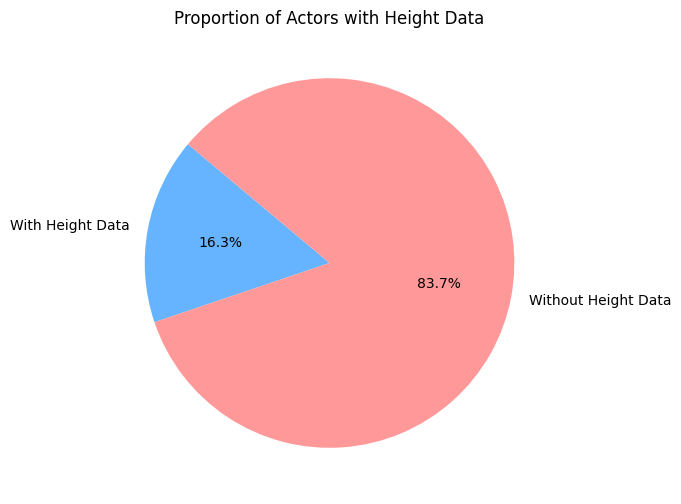

Height available for 5743 actors over 35229 actors


In [336]:

total_actors = unique_actors_df.shape[0]
actors_with_height = unique_actors_df['actor_height'].notna().sum()
actors_without_height = total_actors - actors_with_height

labels = ['With Height Data', 'Without Height Data']
sizes = [actors_with_height, actors_without_height]
colors = ['#66b3ff','#ff9999']  # optional colors for differentiation

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Actors with Height Data')
plt.show()

print(f"Height available for {actors_with_height} actors over {total_actors} actors")


/var/folders/yc/lz46krrd2mj9d_tjm637grg40000gn/T/ipykernel_72305/3818932336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


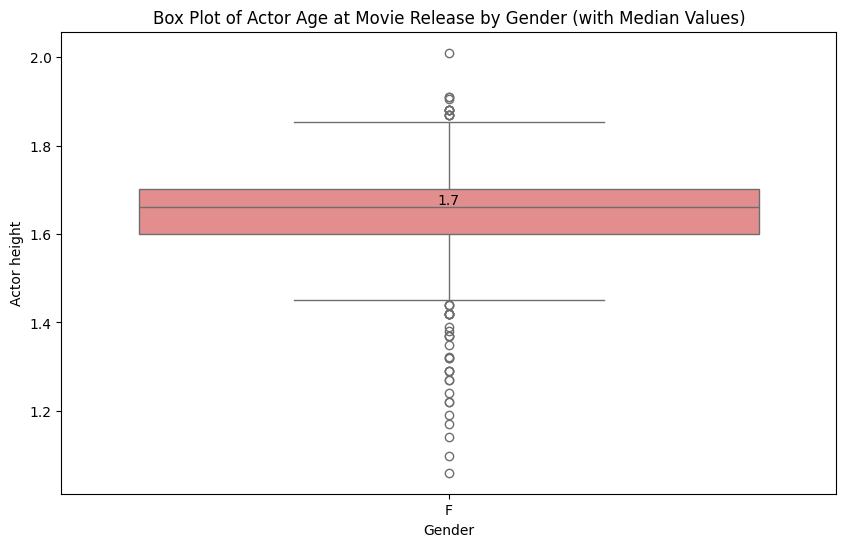

In [337]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom colors for genders
colors = {'F': 'lightcoral', 'M': 'skyblue'}

plt.figure(figsize=(10, 6))

# Create the box plot with custom colors
ax = sns.boxplot(
    data=unique_actors_df,
    x='actor_gender',
    y='actor_height',
    palette=colors
)

# Calculate median values for each gender
median_values = data_character.groupby('actor_gender')['actor_height'].median()

# Annotate the median values on the plot
for i, (gender, median) in enumerate(median_values.items()):
    ax.text(i, median, f'{median:.1f}', color='black', ha='center', va='bottom', fontsize=10)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Actor height')
plt.title('Box Plot of Actor Age at Movie Release by Gender (with Median Values)')

# Show the plot
plt.show()


In [338]:

valid_mask = (data_imdb['ratio_W/M'] >= 0.5) & (data_imdb['num_actors'] > 2)
data_imdb_women = data_imdb[valid_mask].copy()

valid_mask = (women_data['actor_height'] > 1.4) & (women_data['actor_height'] < 1.9)
women_data_crop = women_data[valid_mask].copy()


analysis = pd.merge(
                        women_data_crop.dropna(subset=['actor_age_movie_released'])[['actor_age_movie_released', 'Movie_ID', 'actor_name', 'ethnic_cat', 'actor_height']],
                        data_imdb_women.dropna(subset=['SuccessMetric'])[['title', 'SuccessMetric', 'Movie_ID', 'ratio_W/M']],
                        on='Movie_ID',
                        how = 'inner'
                        )

mean_women_data = analysis.groupby('Movie_ID').agg(
                                                    mean_age=('actor_age_movie_released', 'mean'),
                                                    num_women=('actor_age_movie_released', 'size'),
                                                    title=('title', 'first'),
                                                    SuccessMetric=('SuccessMetric', 'first'),
                                                    ratio_W_M = ('ratio_W/M', 'first'),
                                                    avg_ethnic = ('ethnic_cat', 'mean'),
                                                    avg_height = ('actor_height', 'mean')
                                                ).reset_index()


In [339]:
# Assuming mean_age_data is a NumPy array or structured data
height = mean_women_data['avg_height'].to_numpy()
success_scores = mean_women_data['SuccessMetric'].to_numpy()

valid_mask = ~np.isnan(height) & ~np.isnan(success_scores)

# Check if there are enough valid data points
if valid_mask.sum() > 1:  # Need at least 2 data points for correlation
    # Check for constant values
    if np.std(height[valid_mask]) == 0 or np.std(success_scores[valid_mask]) == 0:
        print("Correlation cannot be computed because one of the variables has zero variance.")
        correlation = np.nan
    else:
        # Compute the correlation
        correlation = np.corrcoef(height[valid_mask], success_scores[valid_mask])[0, 1]
        print(f"Correlation between actress height and movie success score: {correlation:.3f}")
else:
    print("Not enough valid data points for correlation calculation.")
    correlation = np.nan

Correlation between actress height and movie success score: 0.027


# Ethnicity

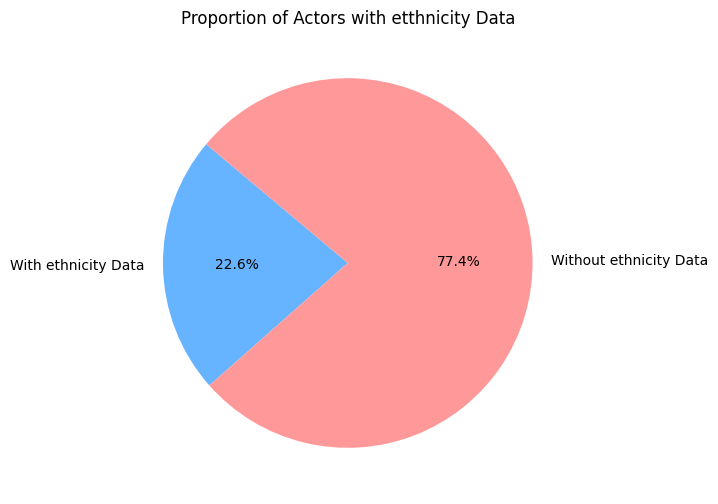

Ethnicity available for 7974 over 35229 actors


In [340]:

total_actors = unique_actors_df.shape[0]
actors_with_ethnicity = ethnicity_df.loc[ethnicity_df['ethnicity_label'].notna(), 'count'].sum()
actors_without_ethnicity = total_actors - actors_with_ethnicity

labels = ['With ethnicity Data', 'Without ethnicity Data']
sizes = [actors_with_ethnicity, actors_without_ethnicity]
colors = ['#66b3ff','#ff9999']  # optional colors for differentiation

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Proportion of Actors with etthnicity Data')
plt.show()

print(f"Ethnicity available for {actors_with_ethnicity} over {total_actors} actors")

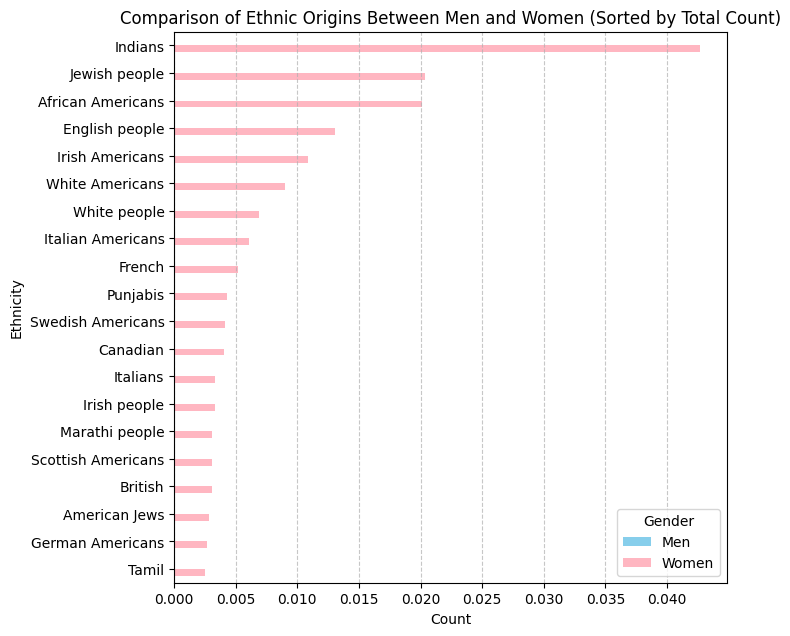

In [341]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_character' has columns 'ethnicity' and 'actor_gender'
# Get top 20 ethnicities for men and women
men_ethnicity_counts = data_character[data_character['actor_gender'] == 'M']['ethnicity'].value_counts()[:20]/data_character[data_character['actor_gender'] == 'M'].shape[0]
women_ethnicity_counts = data_character[data_character['actor_gender'] == 'F']['ethnicity'].value_counts()[:20]/data_character[data_character['actor_gender'] == 'F'].shape[0]

# Combine into a DataFrame, including all unique ethnicities from both lists
ethnicity_df = pd.DataFrame({
    'Men': men_ethnicity_counts,
    'Women': women_ethnicity_counts
}).fillna(0)

# Sort the DataFrame by the sum of counts for both genders in descending order
ethnicity_df['Total'] = ethnicity_df['Men'] + ethnicity_df['Women']
ethnicity_df = ethnicity_df.sort_values(by='Total', ascending=False).drop(columns='Total')

# Plotting
fig, ax = plt.subplots(figsize=(8, 7))
ethnicity_df.plot(kind='barh', color=['skyblue', 'lightpink'], ax=ax)
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.title('Comparison of Ethnic Origins Between Men and Women (Sorted by Total Count)')
plt.gca().invert_yaxis()  # Ensure the largest value is at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.legend(title='Gender')

# Adjust layout to give more space on the y-axis
plt.tight_layout(pad=3)
plt.show()


In [342]:
unique_actors_df.head()

,Unnamed: 0,Wiki_ID,Movie_ID,release_date,character_name,actor_birth_date,actor_gender,actor_height,ethnicity_ID,actor_name,actor_age_movie_released,character/actor_ID,character_ID,Actor_ID,Movie_title,release_year,birth_year,Movie_Count,ethnicity,ethnic_cat
0,0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,Ghosts of Mars,2001.0,1958.0,8,NaN,NaN
1,1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,Ghosts of Mars,2001.0,1974.0,20,Canadian,0.0
2,4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,Ghosts of Mars,2001.0,1977.0,31,NaN,NaN
3,5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,Ghosts of Mars,2001.0,1949.0,44,African Americans,1.0
4,6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,Ghosts of Mars,2001.0,1945.0,41,NaN,NaN


In [343]:

valid_mask = (data_imdb['ratio_W/M'] >= 0.5) & (data_imdb['num_actors'] > 4)
data_imdb_women = data_imdb[valid_mask].copy()


analysis = pd.merge(
                        women_data.dropna(subset=['actor_age_movie_released'])[['actor_age_movie_released', 'Movie_ID', 'actor_name', 'ethnic_cat', 'actor_height']],
                        data_imdb_women.dropna(subset=['SuccessMetric'])[['title', 'SuccessMetric', 'Movie_ID', 'ratio_W/M', 'Rating']],
                        on='Movie_ID',
                        how = 'inner'
                        )

mean_women_data = analysis.groupby('Movie_ID').agg(
                                                    mean_age=('actor_age_movie_released', 'mean'),
                                                    num_women=('actor_age_movie_released', 'size'),
                                                    title=('title', 'first'),
                                                    SuccessMetric=('SuccessMetric', 'first'),
                                                    ratio_W_M = ('ratio_W/M', 'first'),
                                                    avg_ethnic = ('ethnic_cat', 'mean'),
                                                    avg_height = ('actor_height', 'mean'),
                                                    Rating = ('Rating', 'first')
                                                ).reset_index()


In [344]:
import numpy as np

# Extract the data
categories = analysis['ethnic_cat'].to_numpy()
success_scores = analysis['Rating'].to_numpy()

# Filter out NaN values
valid_mask = ~np.isnan(categories) & ~np.isnan(success_scores)

# Check if there are enough valid data points
if valid_mask.sum() > 1:
    # Compute Pearson correlation
    correlation = np.corrcoef(categories[valid_mask], success_scores[valid_mask])[0, 1]
    print(f"Pearson Correlation between average actress height and movie success score: {correlation:.3f}")
else:
    print("Not enough valid data points for correlation calculation.")


Pearson Correlation between average actress height and movie success score: -0.004


In [345]:
data_character.head()

,Unnamed: 0,Wiki_ID,Movie_ID,release_date,character_name,actor_birth_date,actor_gender,actor_height,ethnicity_ID,actor_name,actor_age_movie_released,character/actor_ID,character_ID,Actor_ID,Movie_title,release_year,birth_year,Movie_Count,ethnicity,ethnic_cat
0,0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,Ghosts of Mars,2001.0,1958.0,8,NaN,NaN
1,1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,Ghosts of Mars,2001.0,1974.0,20,Canadian,0.0
2,4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,Ghosts of Mars,2001.0,1977.0,31,NaN,NaN
3,5,975900,/m/03vyhn,2001-08-24,Commander Helena Braddock,1949-05-26,F,1.727,/m/0x67,Pam Grier,52.0,/m/02vdcfp,/m/0bgchnd,/m/0418ft,Ghosts of Mars,2001.0,1949.0,44,African Americans,1.0
4,6,975900,/m/03vyhn,2001-08-24,Whitlock,1945-08-02,F,1.753,NaN,Joanna Cassidy,56.0,/m/02vd6kw,/m/0bgchmx,/m/06lj1m,Ghosts of Mars,2001.0,1945.0,41,NaN,NaN


In [346]:
ethnicity_df.head()

,Men,Women
ethnicity,,
Indians,0.0,0.042707
Jewish people,0.0,0.020350
African Americans,0.0,0.020101
English people,0.0,0.013064
Irish Americans,0.0,0.010879


In [347]:
ethnicity_df['ethnic_cat'] = ethnicity_df.index
valid_mask = (ethnicity_df['count'] >= 5)
ethnicity_df_crop = ethnicity_df[valid_mask]

data_character = pd.merge(data_character, ethnicity_df_crop[['ethnicity_ID', 'ethnic_cat']], on='ethnicity_ID', how='left')
women_data = pd.merge(women_data, ethnicity_df_crop[['ethnicity_ID', 'ethnic_cat']], on='ethnicity_ID', how='left')

ethnicity_df_crop.head()

KeyError: 'count'

In [319]:

valid_mask = (data_imdb['ratio_W/M'] >= 0.5) & (data_imdb['num_actors'] > 4)
data_imdb_women = data_imdb[valid_mask].copy()


analysis = pd.merge(
                        women_data.dropna(subset=['actor_age_movie_released'])[['actor_age_movie_released', 'Movie_ID', 'actor_name', 'ethnic_cat', 'actor_height']],
                        data_imdb_women.dropna(subset=['SuccessMetric'])[['title', 'SuccessMetric', 'Movie_ID', 'ratio_W/M', 'Rating']],
                        on='Movie_ID',
                        how = 'inner'
                        )

mean_women_data = analysis.groupby('Movie_ID').agg(
                                                    mean_age=('actor_age_movie_released', 'mean'),
                                                    num_women=('actor_age_movie_released', 'size'),
                                                    title=('title', 'first'),
                                                    SuccessMetric=('SuccessMetric', 'first'),
                                                    ratio_W_M = ('ratio_W/M', 'first'),
                                                    avg_ethnic = ('ethnic_cat', 'mean'),
                                                    avg_height = ('actor_height', 'mean'),
                                                    Rating = ('Rating', 'first')
                                                ).reset_index()


KeyError: 'ratio_W/M'